In [4]:
from typing import Dict,TypedDict
from langgraph.graph import StateGraph

In [5]:
class AgentState(TypedDict):
    name:str
    age:int
    final:str

In [6]:
def first_node(state:AgentState)->AgentState:
    """
    This is the first node of the graph.
    """
    state["final"]= "hey "+ state["name"]
    return state

def second_node(state:AgentState)->AgentState:
    """
    This is the second node of the graph.
    """
    state["final"]= state["final"]+ " your age is "+ str(state["age"])
    return state



In [9]:
graph = StateGraph(AgentState)

graph.add_node("first",first_node)
graph.add_node("second",second_node)
graph.set_entry_point("first")
graph.set_finish_point("second")
graph.add_edge("first","second")

app = graph.compile()

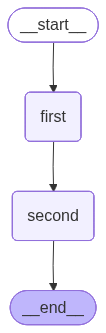

'hey John your age is 25'

In [10]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))
result = app.invoke({"name":"John","age":25})
result["final"]